# NYC 2013 Flight Data EDA ![title](Flights.jpg)

The notebooks explores the scheduled Flights from all New York Airports in year 2013 using Exploratory Data Analysis(EDA).

**Analysis can be use for It cane used for for below reasons :**
    * Finding Number of Flights by Carriers originating from diffrent NYC Airports
    * Determining Number of Flights delayed/Cancelled by Carrier by Airport
    * And analysing the delay pattern

## Loadning of essential Python Libraries for EDA

- The dataset consists of the information about flights scheduled from three Airports in New York  for Year 2013. Various variables present in the dataset includes origin, destination, scheduled departure time, departure time, departure delay, arrival delay, distance, air time and carieer etc. 
- The dataset comprises of __336776 observations of 19 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| year,month,day | Date of departure |
| dep_time,arr_time | Actual departure and arrival times (format HHMM or HMM), local tz. |
| sched_dep_time,sched_arr_time | Scheduled departure and arrival times (format HHMM or HMM),local tz.|
| dep_delay,arr_delay | Departure  and  arrival  delays,  in  minutes.   Negative  times  represent  early departures/arrivals. |
| hour,minute | Time of scheduled departure broken into hour and minutes. |
| carrier | Two letter carrier abbreviation |
| tailnum | Plane tail number |
| flight | Flight number |
| origin,dest | Origin and destination. |
| air_time | Amount of time spent in the air, in minutes |
| distance | Distance between airports, in miles |
| time_hour | Scheduled date and hour of the flight as a POSIXct date |


#### Importing packages
 - Importing required packages for EDA, e.g. Numpy, Pandas, Seaborn etc.

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

from pandas.plotting import parallel_coordinates
import pandas_profiling
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
import cufflinks as cf


#### Importing NYC 2013 Flight Dataset

In [2]:
Flight_df=pd.read_csv('NYC_Flight_Data.csv') # NYC_Flight_Data.csv is present in working folder of Jupyter

## Data Profiling
   - In the upcoming sections we will first __understand our dataset__ using various columns.
   - Then with the help of  profiling we will find which columns of our dataset need preprocessing.
   - In preprocessing we will deal with erronous and missing values of columns. 
   - Again we will do  profiling to see how preprocessing have transformed our dataset.

### Understanding the Dataset

In [3]:
Flight_df.shape

(336776, 19)

In [4]:
Flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [5]:
Flight_df.info

<bound method DataFrame.info of         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
5       2013      1    1     554.0             558       -4.0     740.0   
6       2013      1    1     555.0             600       -5.0     913.0   
7       2013      1    1     557.0             600       -3.0     709.0   
8       2013      1    1     557.0             600       -3.0     838.0   
9       2013      1    1     558.0             600       -2.0     753.0   
10      2013      1    1     558.0             600       -2.0     849.0   
11      2013      1    1     558.0             600       -2.0     85

In [6]:
Flight_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
Flight_df[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,328521.000000,327346.000000,327346.000000,336776.000000
mean,12.639070,6.895377,150.686460,1039.912604
std,40.210061,44.633292,93.688305,733.233033
min,-43.000000,-86.000000,20.000000,17.000000
25%,-5.000000,-17.000000,82.000000,502.000000
50%,-2.000000,-5.000000,129.000000,872.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


### Pandas-Preprofiling

In [8]:
#profile = pandas_profiling.ProfileReport(Flight_df)
#profile.to_file("NYC_Flt_data_preprofiling.html")

### Few Take away from Pandas-Profiling
#### Number of observations	
336776

#### Variables types

Numeric	9

Categorical	5

#### dep_time has 8255 (2.5%) missing values
We can consider these as "Cancelled" flights based on Further Analysis

#### dep_delay is highly correlated with arr_delay


## Working on the Data Set to prepare Data

In [9]:
#Adding Scheduled Departure Date column in Dataset
Flight_df['sched_dep_date']=pd.to_datetime(Flight_df[['year', 'month', 'day']])

In [10]:
# Setting up Flight Range -> Short(< 500 Miles), Medium(500-1000 miles) And Long (>1000 Miles)
Flight_df['Range'] = Flight_df.apply(lambda x : 'Short' if x['distance'] < 500 else ('Long' if x['distance'] > 1000  else  'Medium'), axis=1)

In [11]:
#Adding Delay Ratio for per 100 miles distance
Flight_df['Delay_ratio']=(Flight_df.arr_delay/Flight_df.distance)*100

In [12]:
## Adding a new column for Day of the day of the week in dataset
days = {0:'1: Mon',1:'2: Tue',2:'3: Wed',3:'4: Thurs',4:'5: Fri',5:'6: Sat',6:'Sun'}

Flight_df['day_of_week'] = Flight_df['sched_dep_date'].dt.dayofweek.apply(lambda x: days[x])
Flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,1/1/2013 5:00,2013-01-01,Long,0.785714,2: Tue
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,1/1/2013 5:00,2013-01-01,Long,1.412429,2: Tue
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,1/1/2013 5:00,2013-01-01,Long,3.030303,2: Tue
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,1/1/2013 5:00,2013-01-01,Long,-1.142132,2: Tue
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,1/1/2013 6:00,2013-01-01,Medium,-3.280840,2: Tue


In [13]:
#Breaking Months in two halfs
Flight_df['month_period'] = Flight_df.apply(lambda x: '1st' if x['day'] <=15 else '2nd', axis=1)
Flight_df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,227.0,1400,5,15,1/1/2013 5:00,2013-01-01,Long,0.785714,2: Tue,1st
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,227.0,1416,5,29,1/1/2013 5:00,2013-01-01,Long,1.412429,2: Tue,1st
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,160.0,1089,5,40,1/1/2013 5:00,2013-01-01,Long,3.030303,2: Tue,1st
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,183.0,1576,5,45,1/1/2013 5:00,2013-01-01,Long,-1.142132,2: Tue,1st
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,116.0,762,6,0,1/1/2013 6:00,2013-01-01,Medium,-3.280840,2: Tue,1st


In [14]:
##Shortest Flight
Flight_df[Flight_df.distance == Flight_df['distance'].min()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period
275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,...,NaN,17,1,6,27-07-2013 01:00,2013-07-27,Short,NaN,6: Sat,2nd


We can drop shortest flight from our Dataset as its beteen two airports of NYC and it was scheduled only once but **cancelled as there's no dep_time, arr_time**

In [15]:
Flight_df=Flight_df[Flight_df.distance != 17.0]
Flight_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,227.0,1400,5,15,1/1/2013 5:00,2013-01-01,Long,0.785714,2: Tue,1st
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,227.0,1416,5,29,1/1/2013 5:00,2013-01-01,Long,1.412429,2: Tue,1st
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,160.0,1089,5,40,1/1/2013 5:00,2013-01-01,Long,3.030303,2: Tue,1st
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,183.0,1576,5,45,1/1/2013 5:00,2013-01-01,Long,-1.142132,2: Tue,1st
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,116.0,762,6,0,1/1/2013 6:00,2013-01-01,Medium,-3.280840,2: Tue,1st
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,150.0,719,5,58,1/1/2013 5:00,2013-01-01,Medium,1.668985,2: Tue,1st
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,158.0,1065,6,0,1/1/2013 6:00,2013-01-01,Long,1.784038,2: Tue,1st
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,53.0,229,6,0,1/1/2013 6:00,2013-01-01,Short,-6.113537,2: Tue,1st
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,140.0,944,6,0,1/1/2013 6:00,2013-01-01,Medium,-0.847458,2: Tue,1st
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,138.0,733,6,0,1/1/2013 6:00,2013-01-01,Medium,1.091405,2: Tue,1st


In [16]:
Flight_df[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,328521.000000,327346.000000,327346.000000,336775.000000
mean,12.639070,6.895377,150.686460,1039.915641
std,40.210061,44.633292,93.688305,733.232003
min,-43.000000,-86.000000,20.000000,80.000000
25%,-5.000000,-17.000000,82.000000,502.000000
50%,-2.000000,-5.000000,129.000000,872.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


### Problem Statement 1: No. of Scheduled Flights at each Airport

In [17]:
origin_count = Flight_df['origin'].value_counts()
origin_count.head()

EWR    120834
JFK    111279
LGA    104662
Name: origin, dtype: int64

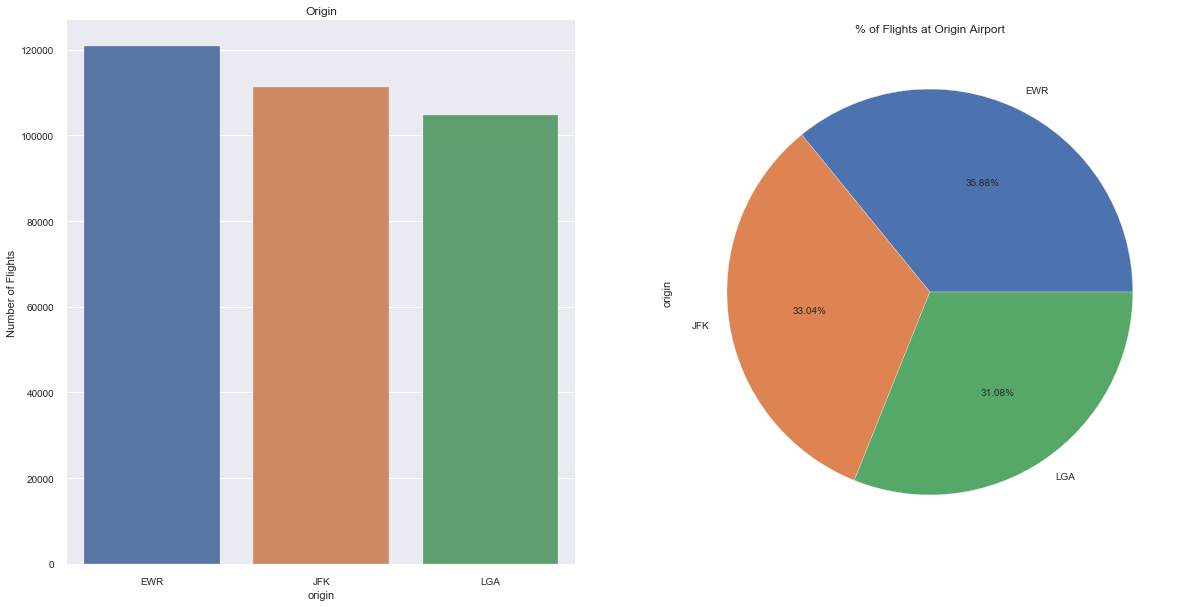

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot('origin',order = Flight_df['origin'].value_counts().index, data=Flight_df,ax=ax[0])
ax[0].set_title('Origin')
ax[0].set_ylabel('Number of Flights')
Flight_df['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% of Flights at Origin Airport')


plt.show()

*  **This suggest that departure traffic is almost evenly distributed at all the three NYC Airports, but Newark(EWR) has slightly more traffic than others** 

### Problem Statement 2: Flights by Airline

In [19]:
carrier_count = Flight_df['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20535
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

In [20]:
carrier_count.shape

(16,)

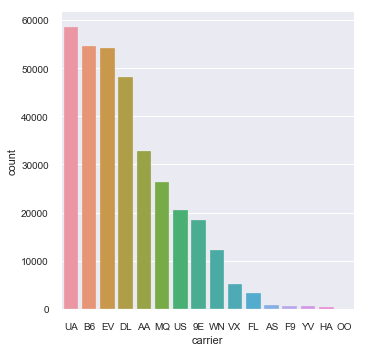

In [21]:
sns.catplot(x="carrier", kind="count", order = Flight_df['carrier'].value_counts().index, data=Flight_df)

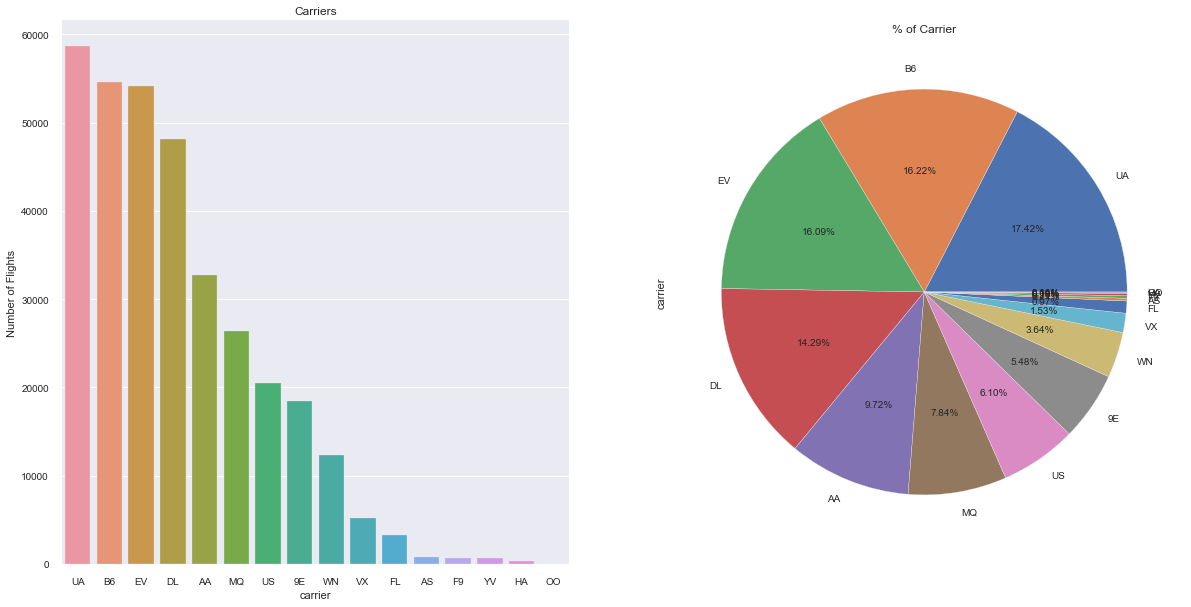

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot('carrier',order = Flight_df['carrier'].value_counts().index, data=Flight_df,ax=ax[0])
ax[0].set_title('Carriers')
ax[0].set_ylabel('Number of Flights')
Flight_df['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% of Carrier')


plt.show()

**Top Three Airlines Carriers At all NYC Airports are UA, B6 and EV** 

| Carrier | Total no .of Flights                                               |
| ------------- |:-------------                                               :| 
| UA    | 58665 | 
| B6    | 54635 |
| EV    | 54173 |




##### UA, B6, EV and DL carriers are having aprox. 65% of total flights departing from all three Airports of NYC**

### Problem Statement 3: Scheduled Flights by each Airlines at each Airport

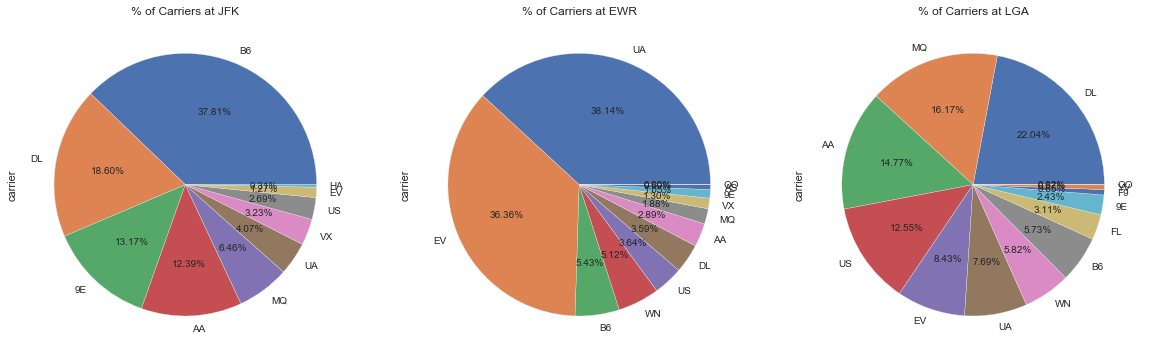

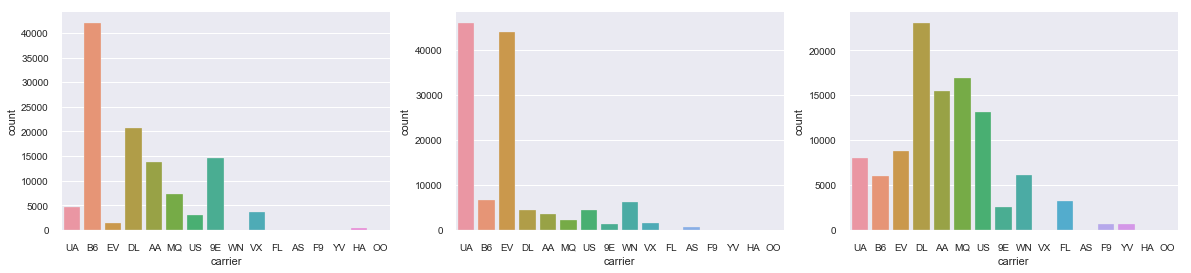

In [23]:
f,ax=plt.subplots(1,3,figsize=(20,20))
Flight_df[Flight_df.origin == 'JFK']['carrier'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0],shadow=False)
ax[0].set_title('% of Carriers at JFK')
Flight_df[Flight_df.origin == 'EWR']['carrier'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1],shadow=False)
ax[1].set_title('% of Carriers at EWR')
Flight_df[Flight_df.origin == 'LGA']['carrier'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[2],shadow=False)
ax[2].set_title('% of Carriers at LGA')
plt.show()
f,ax=plt.subplots(1,3,figsize=(20,4))
sns.countplot('carrier',order = Flight_df['carrier'].value_counts().index, data=Flight_df[Flight_df.origin == 'JFK'], ax=ax[0])
sns.countplot('carrier',order = Flight_df['carrier'].value_counts().index, data=Flight_df[Flight_df.origin == 'EWR'], ax=ax[1])
sns.countplot('carrier',order = Flight_df['carrier'].value_counts().index, data=Flight_df[Flight_df.origin == 'LGA'], ax=ax[2])
plt.show()

* At JFK Highest number of Flights are from Carrier B6 with above 42000 scheduled flights and 37.8% share which is almost double of the second highest carrier DL.
 
* at EWR, UA carrier is having most number of scheduled flights with 38% of share and second is EV with 35.3%
 
* At LGA most flights are from carrier DL which is having 22% of total flights scheduled at this origin and second is MQ


### Problem Statement 4: Overall pattern of departure time from NYC airports 

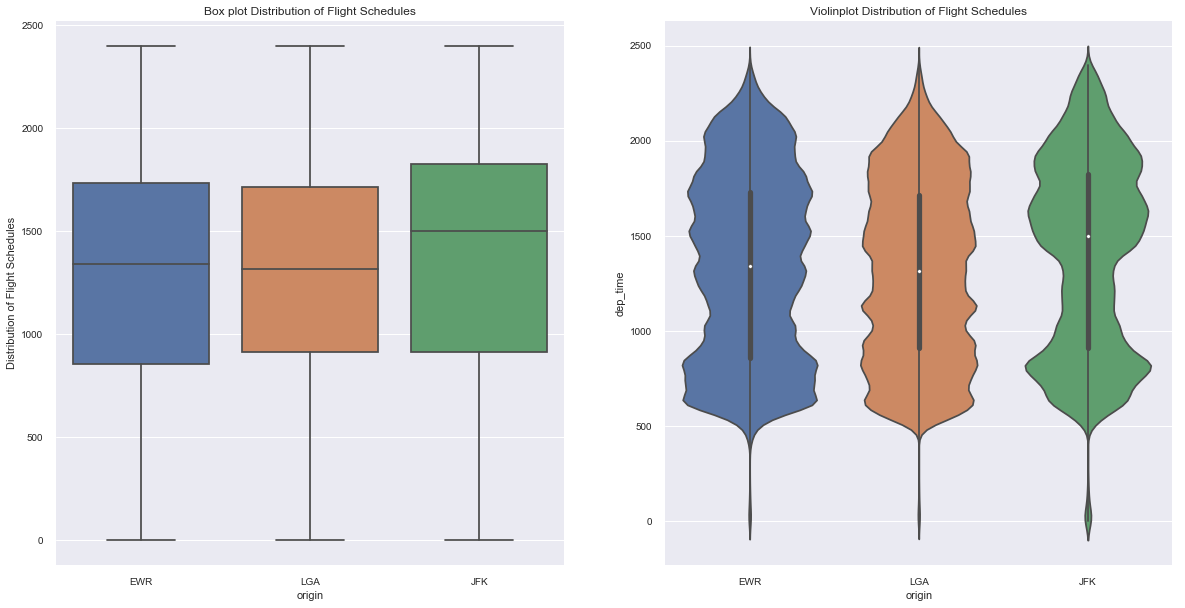

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='origin',y='dep_time', data=Flight_df,ax=ax[0])
ax[0].set_title('Box plot Distribution of Flight Schedules')
ax[0].set_ylabel('Distribution of Flight Schedules')
#Delayed_flt['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('Violinplot Distribution of Flight Schedules')
sns.violinplot(x="origin", y="dep_time",data=Flight_df, split=True, scale="count", ax=ax[1])

plt.show()

**75% of the flights at EWR are scheduled between 8 AM to 8 PM, 50% of the flights scheduled to depart by 1 PM
While at JFK its from 9 AM to 7 PM, 50% of the flights scheduled to depart by 3 PM
And at LGA 50% are scheduled by 1 PM and 75% flights are scheduled between 9 AM to 5 pm


### Problem Statement 5: Range wise Flight departure from NYC airports 
##### Short Haul <500 Miles
##### Medium Haul (500-1000 Mile)
##### And Long Haul (> 1000 Miles)

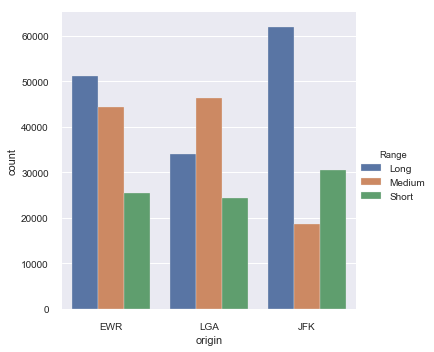

In [25]:
sns.catplot(x="origin",  hue="Range", kind="count", data=Flight_df)

***Most of the Long haul flights are scheduled to depart from JFK followed by EWR.
EWR and LGA are having almost same number of Mid haul flights, while JFK is having very less Medium haul flights.
Again JFK tops in term of short haul flight departures.***

### Problem Statement 6: Range wise pattern of departure time at NYC airports 

Creating a Random and sample dataset to generate a Swarmplot.

Random Sample size = 4000

In [88]:
Flight_df_Sample = Flight_df.sample(4000)

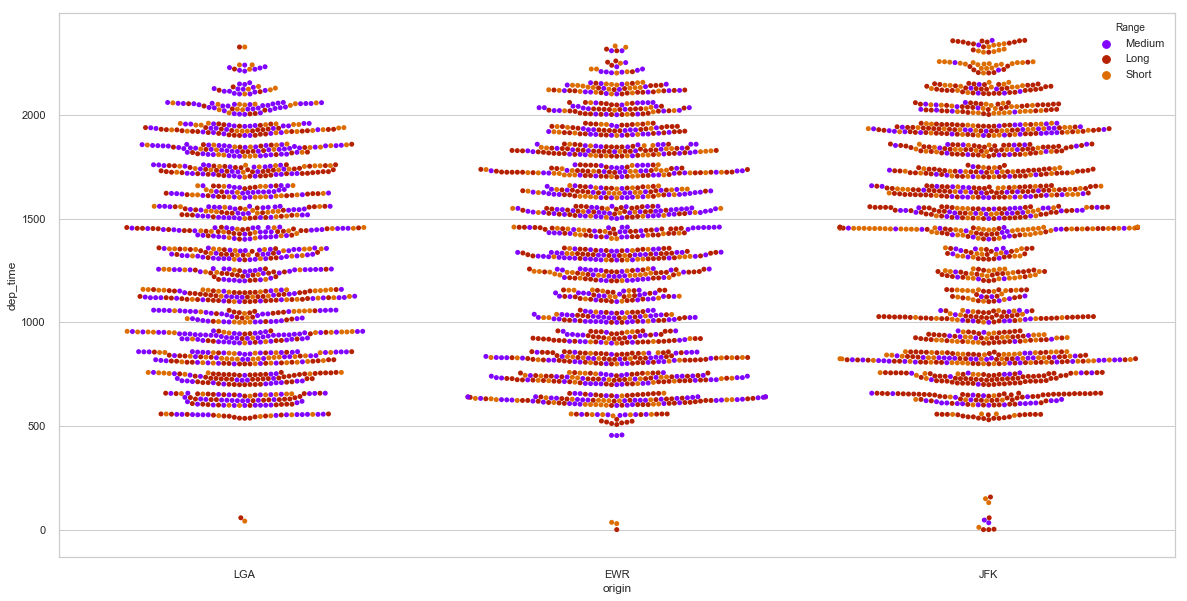

In [92]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(style="whitegrid", palette="muted")

sns.swarmplot(x="origin", y="dep_time", hue="Range", palette="gnuplot", data=Flight_df_Sample)


**At LGA Medium Haul flights are scheduled through out the day. Apart from 7AM to 8 AM where Long Haul flights are scheduled more than Mid Haul.**

**EWR having Long and Mid haul flights scheduled its working hours.**

**JFK is having more number of Long haul flights in Morning and evening, During 10 am to 3 pm JFK is having more Short haul scheduled flights.**

## Analysis of Flights Departure
   - Study of Flight departure trends - Early, Ontime, Delayed, Cancelled

### Problem Statement 7: Scheduled Flight Status at New York Airports

In [26]:
#Adding information for Flight status at NYC airports using dep_delay column
Flight_df['flt_status_nyc'] = Flight_df.apply(lambda x : 'Early' if x['dep_delay'] < 0 else ('On Time' if x['dep_delay'] == 0 else ('Delayed' if x['dep_delay'] > 0 else 'Cancelled')), axis=1)
Flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period,flt_status_nyc
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,1400,5,15,1/1/2013 5:00,2013-01-01,Long,0.785714,2: Tue,1st,Delayed
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,1416,5,29,1/1/2013 5:00,2013-01-01,Long,1.412429,2: Tue,1st,Delayed
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,1089,5,40,1/1/2013 5:00,2013-01-01,Long,3.030303,2: Tue,1st,Delayed
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,1576,5,45,1/1/2013 5:00,2013-01-01,Long,-1.142132,2: Tue,1st,Early
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,762,6,0,1/1/2013 6:00,2013-01-01,Medium,-3.280840,2: Tue,1st,Early


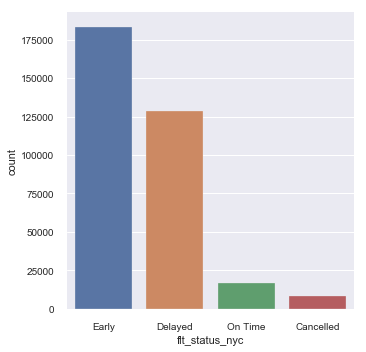

In [27]:
sns.catplot(x="flt_status_nyc", kind="count", order = Flight_df['flt_status_nyc'].value_counts().index, data=Flight_df)

**Most of the Flights have departed early from New York Airports. and some 125000 flights have been delayed. Around 20000 flights are on time and very few flights have been cancelled.**

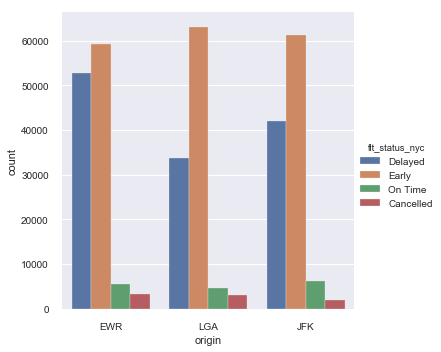

In [28]:
sns.catplot(x="origin",  hue="flt_status_nyc", kind="count", data=Flight_df)

- Above plot indicates that All three Airports have almost common trends for Early, Ontime, and Cancelled departures.
- But __EWR__ have higher frequency of __delay departures__ than other two airports

### Problem Statement 8: Scheduled Flight Status - Range Wise

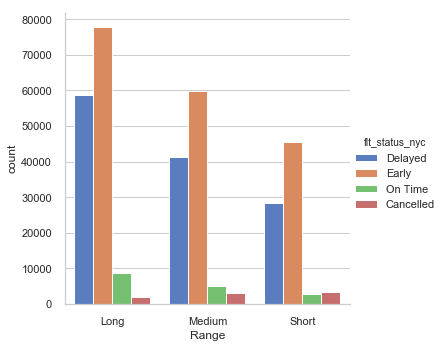

In [93]:
sns.catplot(x="Range",  hue="flt_status_nyc", kind="count", data=Flight_df)

**Delayed and early flight ratio is almost same for all the Range**

**There's more Cancellation than On time departure for Short Haul Flights.**


### Problem Statement 9: Airport wise Average Departure Delay including all Flights

Text(0.5, 1.0, 'Airport wise Average Departure Delay including all Flights')

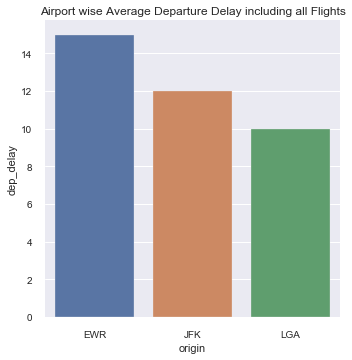

In [29]:
#Airport wise Average Departure Delay including all Flights
Avg_origin_Delay = Flight_df.groupby(['origin'], as_index=False).agg({'dep_delay': 'mean'})
Avg_origin_Delay['dep_delay']=np.round(Avg_origin_Delay['dep_delay'],0)
sns.catplot(x='origin', y='dep_delay',data=Avg_origin_Delay, kind='bar' )
plt.title("Airport wise Average Departure Delay including all Flights") 


***Flight departing from EWR have aprox. 15 minute of delay compared to JFK at 12 minutes and LGA at 10 Minutes***

### Problem Statement 10: Carrier Average Departure Delay Including all Flights

Text(0.5, 1.0, 'Carrier Average Departure Delay Including all Flights')

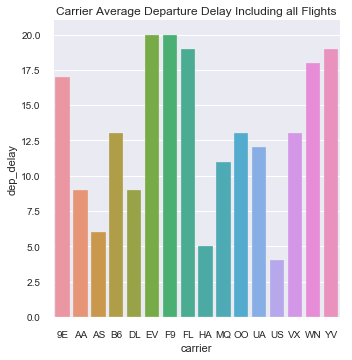

In [30]:
#Carrier Average Departure Delay Including all Flights
Avg_carrier_Delay = Flight_df.groupby(['carrier'], as_index=False).agg({'dep_delay': 'mean'})
Avg_carrier_Delay['dep_delay']=np.round(Avg_carrier_Delay['dep_delay'],0)
sns.catplot(x='carrier', y='dep_delay',data=Avg_carrier_Delay, kind='bar' )
plt.title("Carrier Average Departure Delay Including all Flights") 


In [68]:
#Avg_arr_delay_sort by Carrier in 2013 (Overall - inclusive early departure)

Flight_df.groupby('carrier').agg(np.size)                 
top_delay = Flight_df.groupby('carrier').agg({'dep_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('dep_delay', 'mean')], ascending=False).head(5)

dep_delay           
             size       mean
carrier                     
F9          685.0  20.215543
EV        54173.0  19.955390
YV          601.0  18.996330
FL         3260.0  18.726075
WN        12275.0  17.711744

**Top five Airlines which have higher departure delay average are F9, EV, YV, FL, WN**

In [69]:
top_delay.sort_values([('dep_delay', 'mean')], ascending=True).head(5)

dep_delay          
             size      mean
carrier                    
US        20535.0  3.782418
HA          342.0  4.900585
AS          714.0  5.804775
AA        32729.0  8.586016
DL        48110.0  9.264505

**Top five Airlines which have lowest departure delay average are US, HA, AS, AA, DL**

### Problem Statement 11: Carrier Average Arrival Delay at Destination Including all Flights

In [96]:
Flight_df[['arr_delay','distance']].describe()

,arr_delay,distance
count,327346.000000,336775.000000
mean,6.895377,1039.915641
std,44.633292,733.232003
min,-86.000000,80.000000
25%,-17.000000,502.000000
50%,-5.000000,872.000000
75%,14.000000,1389.000000
max,1272.000000,4983.000000


Text(0.5, 1.0, 'Carrier Arrival Departure Delay Including all Flights')

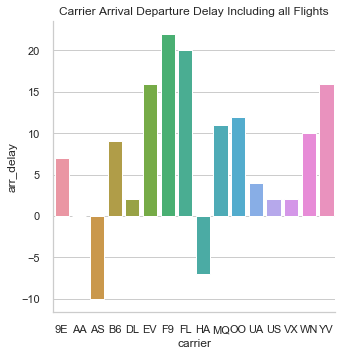

In [95]:
#Carrier Average Arrival Delay Including all Flights
Avg_carrier_Delay = Flight_df.groupby(['carrier'], as_index=False).agg({'arr_delay': 'mean'})
Avg_carrier_Delay['arr_delay']=np.round(Avg_carrier_Delay['arr_delay'],0)
sns.catplot(x='carrier', y='arr_delay',data=Avg_carrier_Delay, kind='bar' )
plt.title("Carrier Arrival Departure Delay Including all Flights") 

In [31]:
#Avg_arr_delay_sort by Carrier in 2013 (Overall - inclusive early arrival)

Flight_df.groupby('carrier').agg(np.size)                 
top_delay = Flight_df.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(5)

arr_delay           
             size       mean
carrier                     
F9          685.0  21.920705
FL         3260.0  20.115906
EV        54173.0  15.796431
YV          601.0  15.556985
OO           32.0  11.931034

**Top 5 Airline carriers which have maximum Arrival delay at Destination are - F9, FL, EV, YV, OO**

In [32]:
top_delay.sort_values([('arr_delay', 'mean')], ascending=True).head(5)

arr_delay          
             size      mean
carrier                    
AS          714.0 -9.930889
HA          342.0 -6.915205
AA        32729.0  0.364291
DL        48110.0  1.644341
VX         5162.0  1.764464

**Top 5 Airline carriers which have minimum Arrival delay at Destination are - AS, HA, AA, DL, VX**
**AS & HA has -ve average delay, which tells that most of the time flights from these carriers are reaching destination before scheduled time**

## Monthly Average Delay Analysis

### Problem Statement 12: Monthly Average Departure Delay

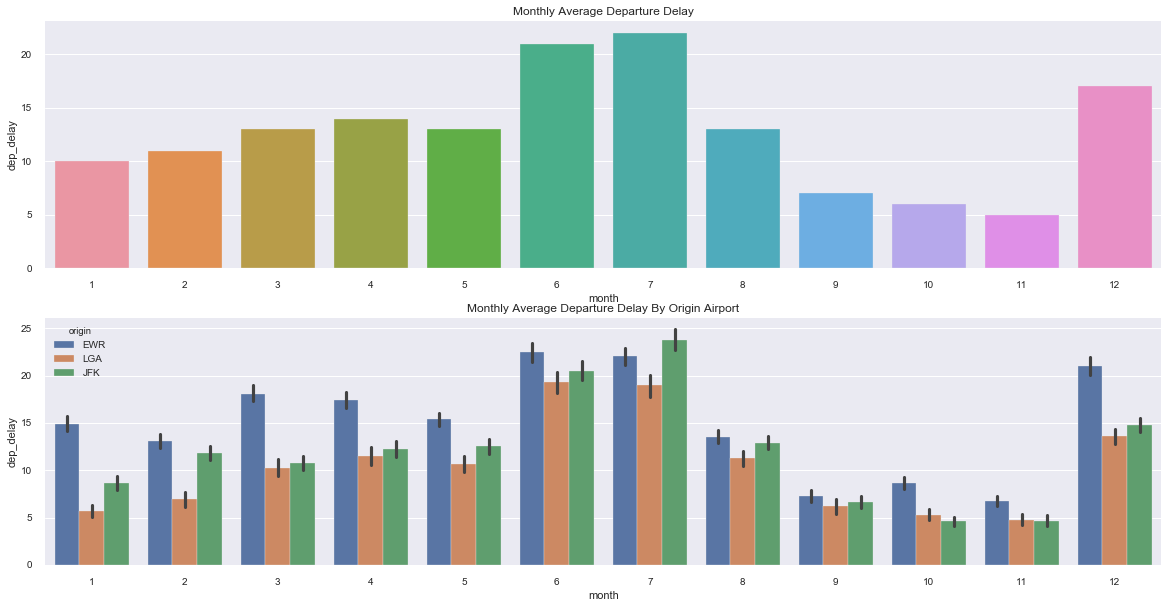

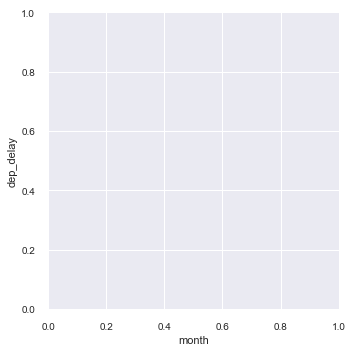

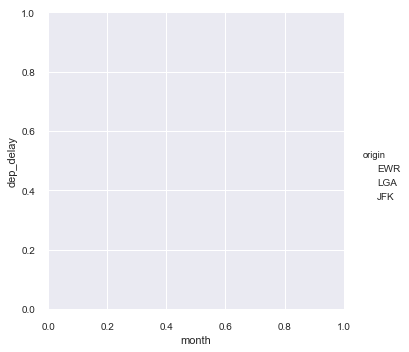

In [33]:
#Monthly Average Departure Delay
Avg_Mnth_Delay = Flight_df.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
Avg_Mnth_Delay['dep_delay']=np.round(Avg_Mnth_Delay['dep_delay'],0)
f,ax=plt.subplots(2,1,figsize=(20,10))
sns.catplot(x='month', y='dep_delay',data=Avg_Mnth_Delay, kind='bar', ax=ax[0])
ax[0].set_title('Monthly Average Departure Delay')
#Monthly Average Departure Delay By Origin Airport
sns.catplot(x="month", y='dep_delay', hue="origin", kind="bar",  data=Flight_df,ax=ax[1])
ax[1].set_title('Monthly Average Departure Delay By Origin Airport')

plt.show()

#### Average Delay time is higher in Month of Jun, July and December


###  Days of the week Average Departure Delay By Airport

In [34]:
#Days of the week Average Departure Delay including all flights
Avg_Dow_Delay = Flight_df.groupby(['day_of_week'], as_index=False).agg({'dep_delay': 'mean'})
Avg_Dow_Delay['dep_delay']=np.round(Avg_Dow_Delay['dep_delay'],0)


Text(0.5, 1.0, 'Daywise Average Departure Delay by Airport')

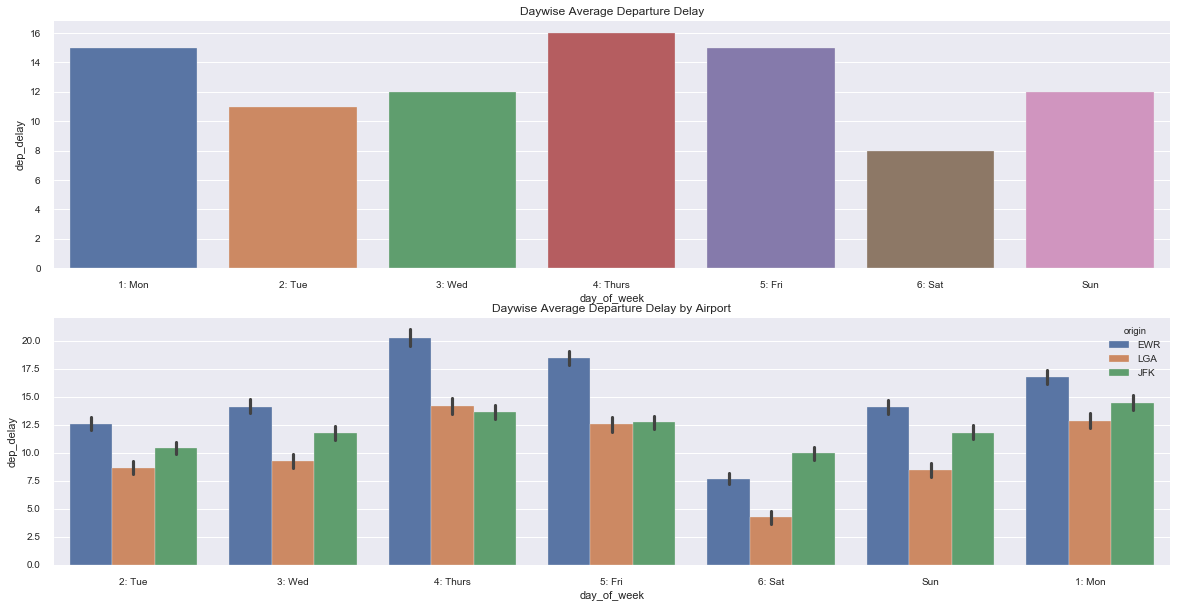

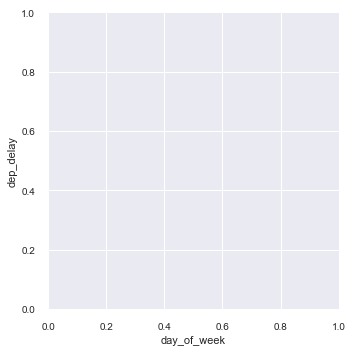

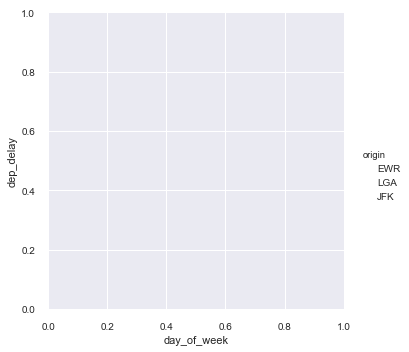

In [35]:
f,ax=plt.subplots(2,1,figsize=(20,10))
sns.catplot('day_of_week', 'dep_delay',data=Avg_Dow_Delay, kind='bar', ax=ax[0])
ax[0].set_title('Daywise Average Departure Delay')
sns.catplot("day_of_week", 'dep_delay', hue="origin", kind="bar",  data=Flight_df, ax=ax[1])
ax[1].set_title('Daywise Average Departure Delay by Airport')

In [36]:
Top_3_Months_AD=Flight_df[(Flight_df.month == 6) | (Flight_df.month == 7) | (Flight_df.month == 12) ]
Top_3_Months_AD.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period,flt_status_nyc
83161,2013,12,1,13.0,2359,14.0,446.0,445,1.0,B6,...,1617,23,59,1/12/2013 23:00,2013-12-01,Long,0.061843,Sun,1st,Delayed
83162,2013,12,1,17.0,2359,18.0,443.0,437,6.0,B6,...,1576,23,59,1/12/2013 23:00,2013-12-01,Long,0.380711,Sun,1st,Delayed
83163,2013,12,1,453.0,500,-7.0,636.0,651,-15.0,US,...,529,5,0,1/12/2013 5:00,2013-12-01,Medium,-2.835539,Sun,1st,Early
83164,2013,12,1,520.0,515,5.0,749.0,808,-19.0,UA,...,1400,5,15,1/12/2013 5:00,2013-12-01,Long,-1.357143,Sun,1st,Delayed
83165,2013,12,1,536.0,540,-4.0,845.0,850,-5.0,AA,...,1089,5,40,1/12/2013 5:00,2013-12-01,Long,-0.459137,Sun,1st,Early


### Problem Statement 13: Average delay analysis for Peak Months ( Month Jun, Jul and Dec)

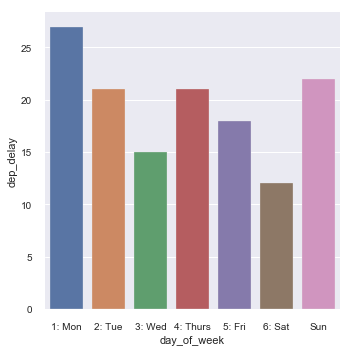

In [37]:
Avg_Mnth_Delay_AD = Top_3_Months_AD.groupby(['day_of_week'], as_index=False).agg({'dep_delay': 'mean'})
Avg_Mnth_Delay_AD['dep_delay']=np.round(Avg_Mnth_Delay_AD['dep_delay'],0)
sns.catplot(x='day_of_week', y='dep_delay',data=Avg_Mnth_Delay_AD, kind='bar')

#### Flights on Sunday and Monday are having higher average delay for Pick Months.

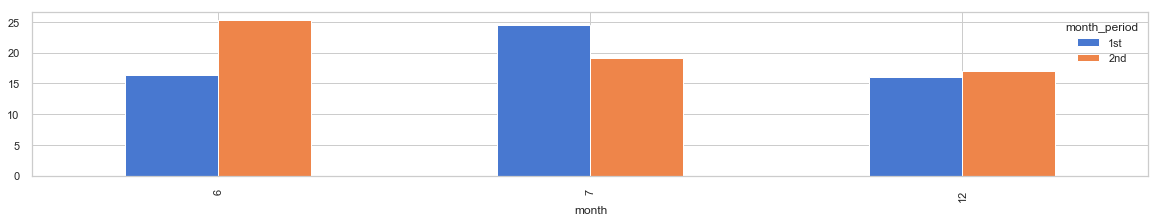

In [97]:
Month_Trend = Top_3_Months_AD.groupby([ 'month', 'month_period'])['dep_delay'].mean()
Month_Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

**Average Departure Delay is higher is 2nd half of Jun and 1st half of July. As these are the starting of Summer Holiday season.**

**And in Month of december its evenly distributed in both half of the month. as in first half many flights may be delayed due to bad weather like Snow etc. and in 2nd half there may be chances of high traffic at Airport - Check-ins, Security & boarding for Winter Holidays**


### Problem Statement 14: Delay Ratio analysis for Peak Months ( Month Jun, Jul and Dec)

**Delay Ratio is defined as the delay in Minutes for each 100 minles distsance of the flight.**

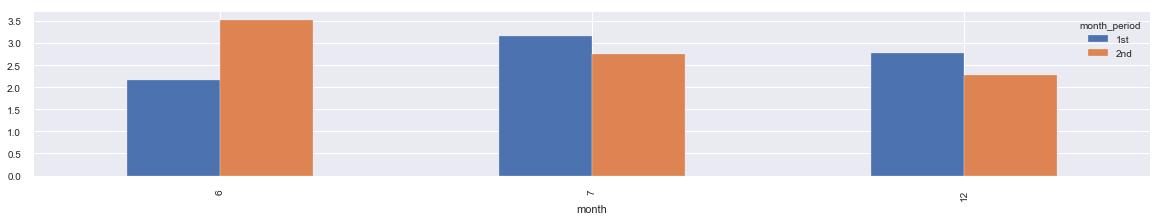

In [38]:
Month_Trend = Top_3_Months_AD.groupby([ 'month', 'month_period'])['Delay_ratio'].mean()
Month_Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

####  Delay ratio for Flights on 2nd half of June, First half of the July and First half of the December are higher.
Reason may be : These are the months for Summer and Winter vacation, which may cause higher traffic at airport, check-ins, security checks and boarding delays.

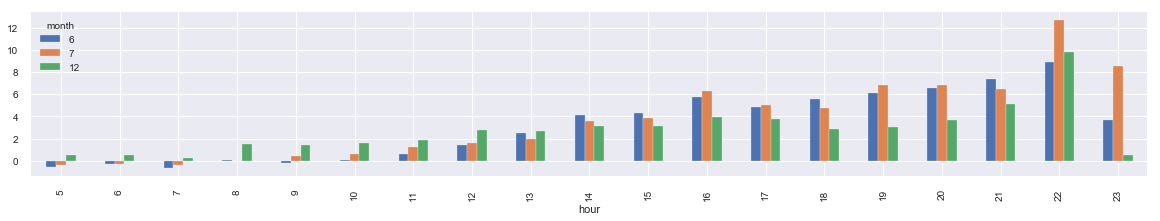

In [39]:
Month_Trend = Top_3_Months_AD.groupby([ 'hour', 'month'])['Delay_ratio'].mean()
Month_Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

**Average Delay Ratio is increasing with the hour.**

**For Jun and Jul, Delay Ratio is -ve or very less between 5 AM to 10 AM.**

**Average Delay Ratio is higher for flights scheduled bewteen 9 PM to 11PM**

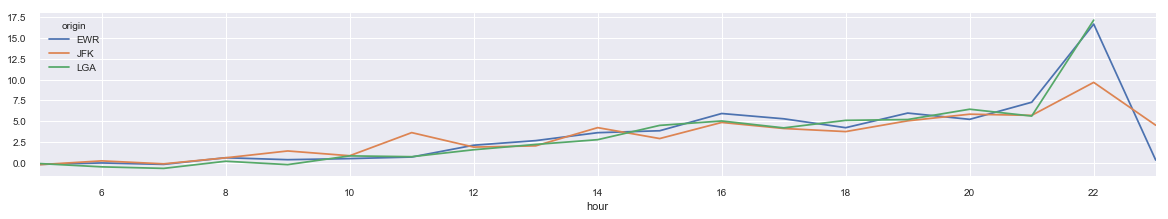

In [40]:
Month_Trend = Top_3_Months_AD.groupby([ 'hour', 'origin'])['Delay_ratio'].mean()
Month_Trend.unstack().plot.line(stacked=False,figsize=(20,3))

#### For the peak months Delay ratio is increasing with the time of departure at each of the airports.

## Delayed Departure Analysis

In [41]:
Delayed_flt=Flight_df[Flight_df.flt_status_nyc == 'Delayed']

In [100]:
Delayed_flt.shape

(128432, 25)

### Problem Statement 15: Flights that departed delayed at New York

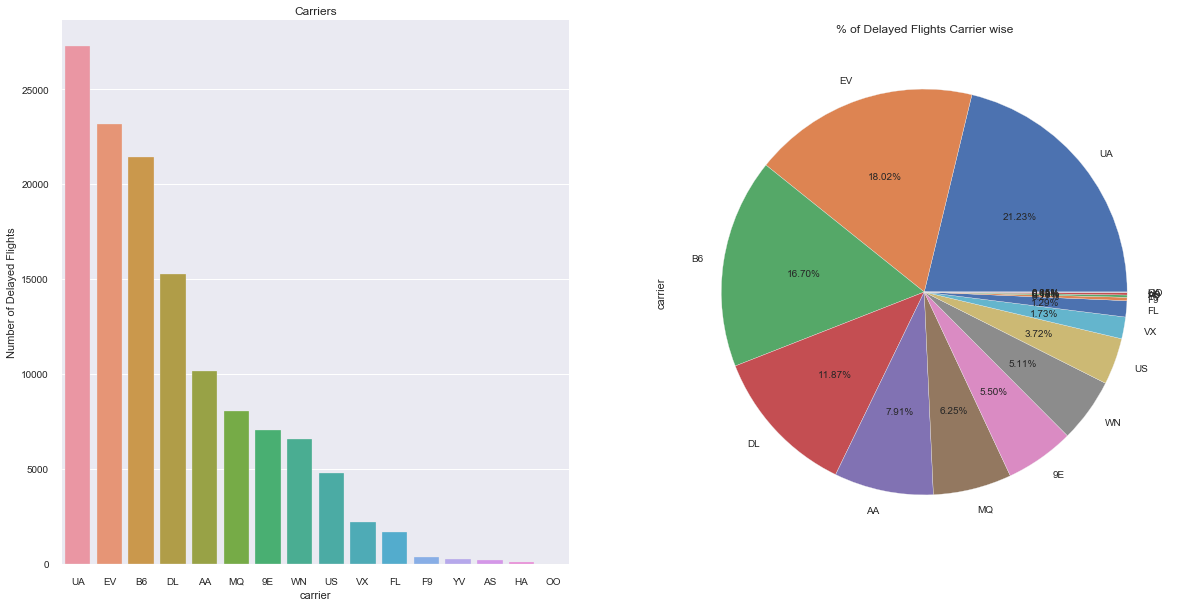

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot('carrier',order = Delayed_flt['carrier'].value_counts().index, data=Delayed_flt,ax=ax[0])
ax[0].set_title('Carriers')
ax[0].set_ylabel('Number of Delayed Flights')
Delayed_flt['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% of Delayed Flights Carrier wise')


plt.show()

**Top three most delayed Airlines are UA, EV & B6**

In [99]:
Delayed_flt['carrier'].value_counts().head(3)


UA    27261
EV    23139
B6    21445
Name: carrier, dtype: int64

Text(0.5, 1.0, 'Carrierwise Departure Delay Distribution')

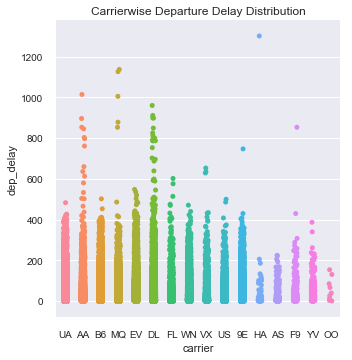

In [43]:
#Carrierwise Average Departure Delay By Origin Airport
sns.catplot(x="carrier", y='dep_delay' , data=Delayed_flt)
plt.title("Carrierwise Departure Delay Distribution") 

### Problem Statement 16: Carrierwise Departure Delay Distribution

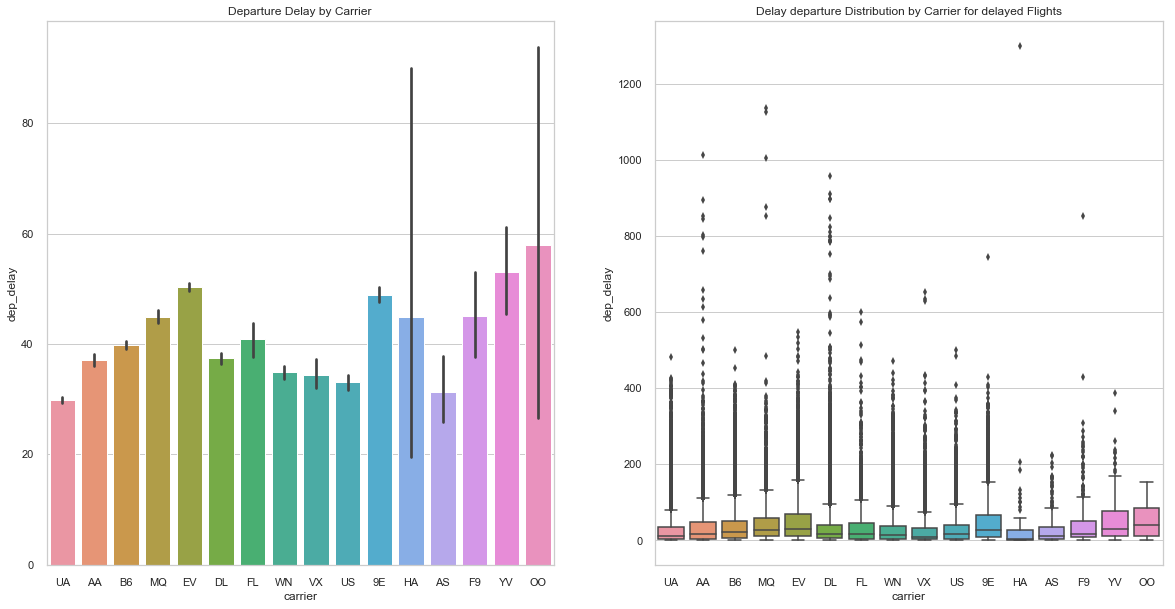

In [104]:
#Average departure delay by Airlines for delayed Flights in NYC Airports in 2013

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('carrier','dep_delay', data=Delayed_flt,ax=ax[0])
                                                                                 
ax[0].set_title('Departure Delay by Carrier')
sns.boxplot('carrier','dep_delay', data=Delayed_flt,ax=ax[1])
ax[1].set_title('Delay departure Distribution by Carrier for delayed Flights')
plt.show()


In [103]:
#Avg_dep_delay_sort by Carrier in 2013 (Only delayed Flights)

Delayed_flt.groupby('carrier').agg(np.size)                 
top_delay_Delayed_flt = Delayed_flt.groupby('carrier').agg({'dep_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay_Delayed_flt.sort_values([('dep_delay', 'mean')], ascending=True).head(5)

dep_delay           
             size       mean
carrier                     
UA        27261.0  29.926195
AS          226.0  31.340708
US         4775.0  33.050681
VX         2225.0  34.454831
WN         6558.0  34.857426

__Top fine Airlines for best average delay time are__

  __UA__, 
  __AS__, 
  __US__, 
  __VX__, 
  __WN__

In [46]:
top_delay_Delayed_flt.sort_values([('dep_delay', 'mean')], ascending=False).head(5)

dep_delay           
             size       mean
carrier                     
OO            9.0  58.000000
YV          233.0  52.952790
EV        23139.0  50.329790
9E         7063.0  48.920006
F9          341.0  45.137830

__Five Airlines which have highest Average delay are__

  __OO__, 
  __YV__, 
  __EV__, 
  __9E__, 
  __F9__

### Problem Statement 17: Avg. Monthly Departure Delay for Carrier

In [101]:
# Avg. Monthly Departure Delay for Carrier

Monthly_Avg_Delay= Delayed_flt.groupby(['carrier','month'], axis=0, as_index=True).agg({'dep_delay':'mean'})
Monthly_Avg_Delay.head(15)

dep_delay
carrier month           
9E      1      51.932056
        2      52.954990
        3      47.985130
        4      51.940552
        5      55.681747
        6      58.169839
        7      60.890521
        8      42.513302
        9      38.124722
        10     35.906303
        11     36.793319
        12     46.305930
AA      1      30.375000
        2      32.380048
        3      37.055872

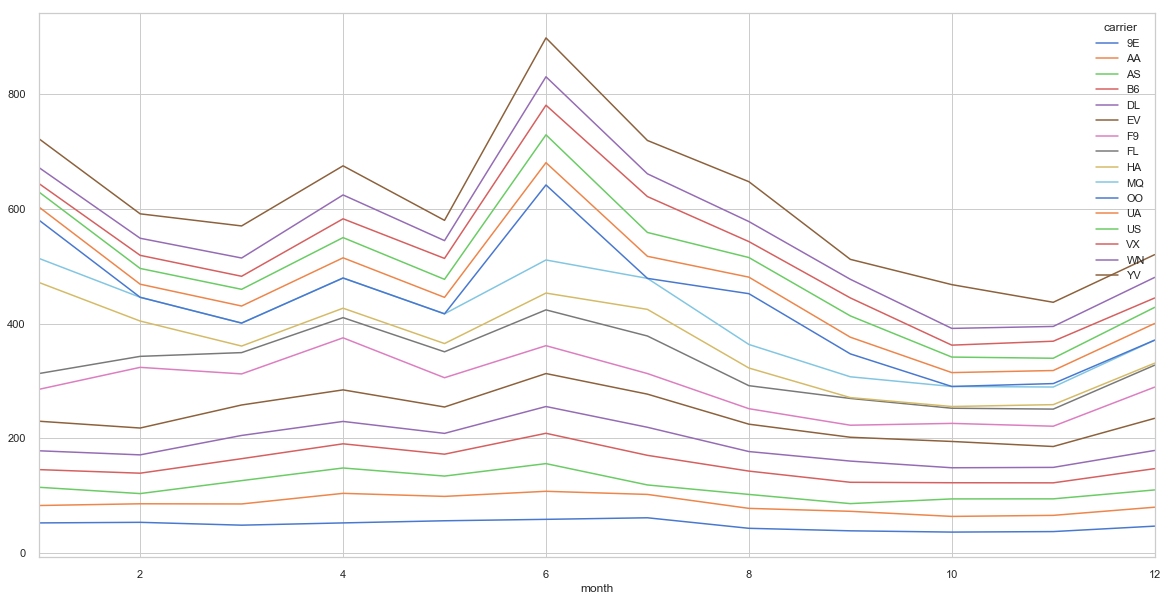

In [113]:
Monthly_Avg_Delay.reset_index()
Trend1 = Monthly_Avg_Delay.groupby(['month', 'carrier'])['dep_delay'].mean()
Trend1.unstack().plot.line(stacked=True,figsize=(20,10))

**There's lots of variation in average Monthly delay for Airlines 9E, AA, AS, B6 and DL and these airlines are causing the maximum delay in Months of Jun, Jul, Dec and Jan.**

**YV, WN are the airlines for which there's very less change in average departure delay**

## Delayed Arrival Analysis

In [48]:
#Delayed_Arr['Delay_ratio']=(Delayed_Arr.arr_delay/Delayed_Arr.distance)*100

Delayed_Arr= Flight_df[Flight_df.arr_delay > 0]
Delayed_Arr.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,distance,hour,minute,time_hour,sched_dep_date,Range,Delay_ratio,day_of_week,month_period,flt_status_nyc
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,1400,5,15,1/1/2013 5:00,2013-01-01,Long,0.785714,2: Tue,1st,Delayed
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,1416,5,29,1/1/2013 5:00,2013-01-01,Long,1.412429,2: Tue,1st,Delayed
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,1089,5,40,1/1/2013 5:00,2013-01-01,Long,3.030303,2: Tue,1st,Delayed
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,719,5,58,1/1/2013 5:00,2013-01-01,Medium,1.668985,2: Tue,1st,Early
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,1065,6,0,1/1/2013 6:00,2013-01-01,Long,1.784038,2: Tue,1st,Early


### Problem Statement 18: Average delay arrival & Delay ratio By Month 

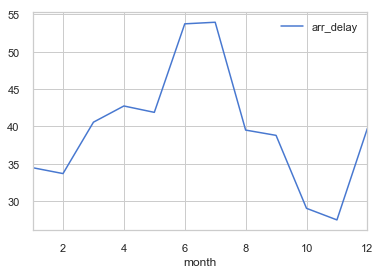

In [116]:
#Average delay arrival By Month 

Delayed_Arr[['month','arr_delay']].groupby(['month']).mean().plot()

plt.show()

**Average Delay Arrival at Destination airports is high in Month of Jun July and Dec**
**Its low in Month of Oct & Nov.**

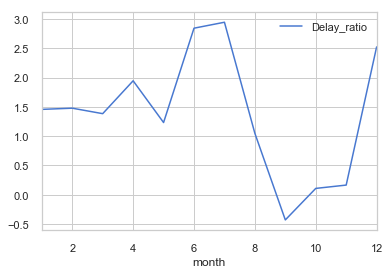

In [118]:
#Average Delay Ratio By Month
Flight_df[['month','Delay_ratio']].groupby(['month']).mean().plot()
plt.show()

**Average Delay ratio at Destination airports is high in Month of Jun, July and Dec**
**Its low in Month of Sep, Oct & Nov.**

### Problem Statement 19: Median delay arrival  By Month & Range

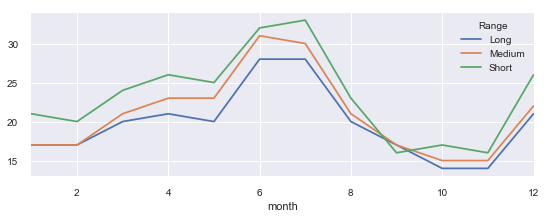

In [52]:
Trend = Delayed_Arr.groupby(['month', 'Range'])['arr_delay'].median()
Trend.unstack().plot.line(stacked=False,figsize=(9,3))

**Range wise delay median is high in Month of Jun and Jul and again in Month of Dec. Its very low in month of Oct & Nov.**

### Problem Statement 20: Average Delay ratio by Month and Range

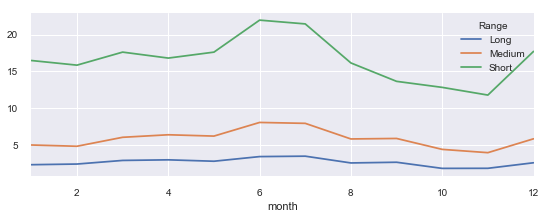

In [53]:
Trend = Delayed_Arr.groupby(['month', 'Range'])['Delay_ratio'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(9,3))

**Delay Ratio for Long Haul Flights is very less compared to Mid Haul and Short Flights.**

**Long & Mid Haul Flights Delay ratio are not varrying as short Haul**

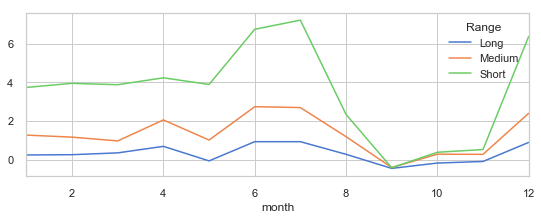

In [119]:
Trend = Flight_df.groupby(['month', 'Range'])['Delay_ratio'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(9,3))

**If the same is compared against all the Flight Data, in Month of Sep and Oct, Average Delay Ratio for all flights are nearly same**

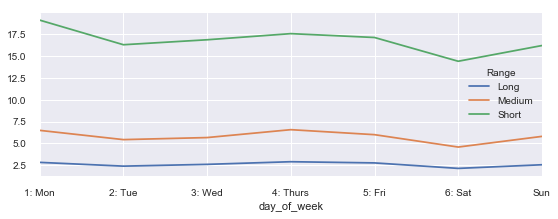

In [54]:
Trend = Delayed_Arr.groupby(['day_of_week', 'Range'])['Delay_ratio'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(9,3))

### Problem Statement 21 : Average arrival Delay & Delay Ratio  by Month and origin of Flight

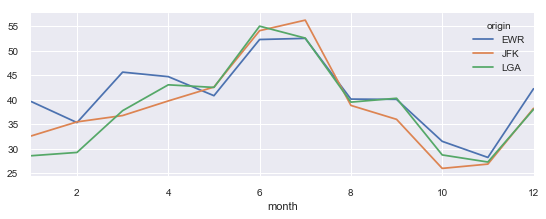

In [55]:
Trend = Delayed_Arr.groupby(['month', 'origin'])['arr_delay'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(9,3))

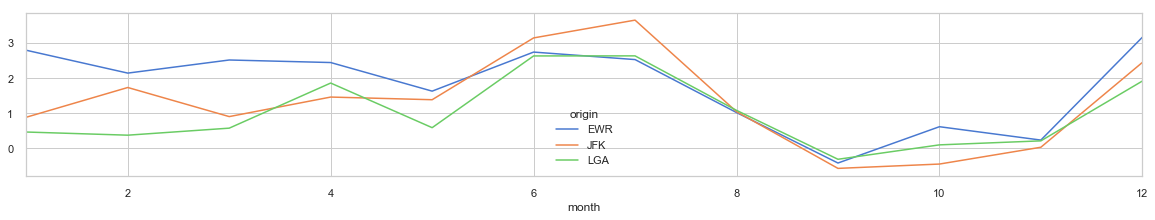

In [120]:
Trend = Flight_df.groupby(['month', 'origin'])['Delay_ratio'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(20,3))

**Average Delay and Delay Ratio follow same pattern across the three NYC airports**

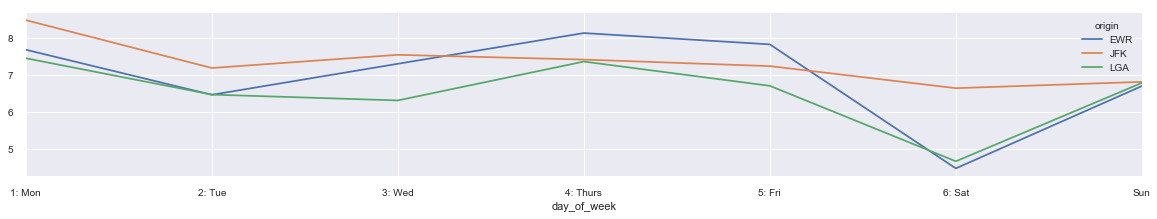

In [57]:
Trend = Delayed_Arr.groupby(['day_of_week', 'origin'])['Delay_ratio'].mean()
Trend.unstack().plot.line(stacked=False,figsize=(20,3))

Text(0.5, 1.0, 'Carrierwise wise delay ratio at each Airport')

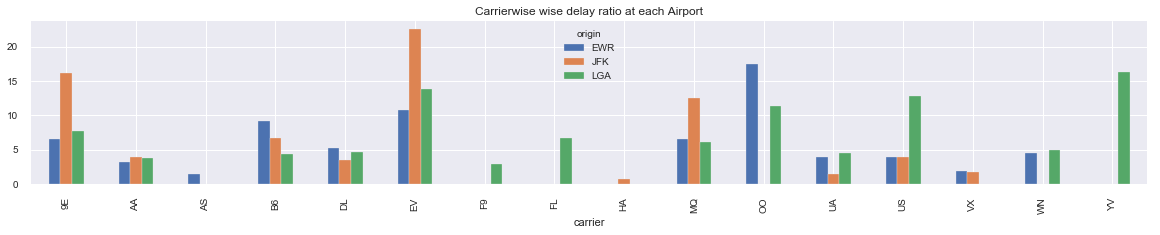

In [58]:
Trend = Delayed_Arr.groupby(['carrier', 'origin'])['Delay_ratio'].mean()
Trend.unstack().plot.bar(stacked=False,figsize=(20,3))
plt.title("Carrierwise wise delay ratio at each Airport")

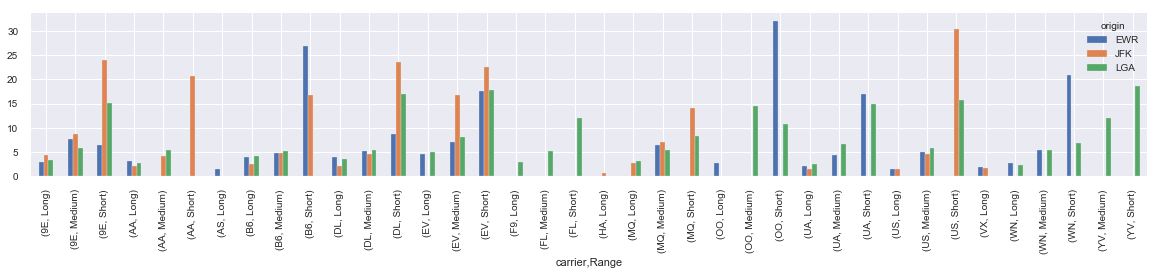

In [59]:
Trend = Delayed_Arr.groupby(['carrier', 'Range', 'origin'])['Delay_ratio'].mean()
Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

### Top three Months for delay by Arrival at desitination

In [60]:
Delayed_Arr['month'].value_counts().head(3).sort_index()

4     12522
7     13304
12    14394
Name: month, dtype: int64

In [61]:
Top_3_Months=Delayed_Arr[(Delayed_Arr.month == 4) | (Delayed_Arr.month == 7) | (Delayed_Arr.month == 12) ]

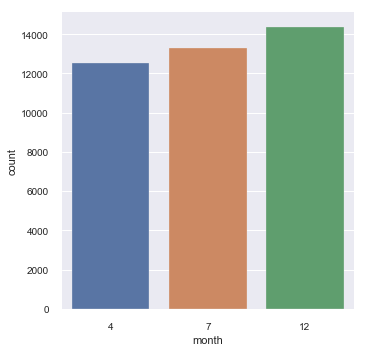

In [62]:
sns.catplot(x="month", kind="count",  data=Top_3_Months)

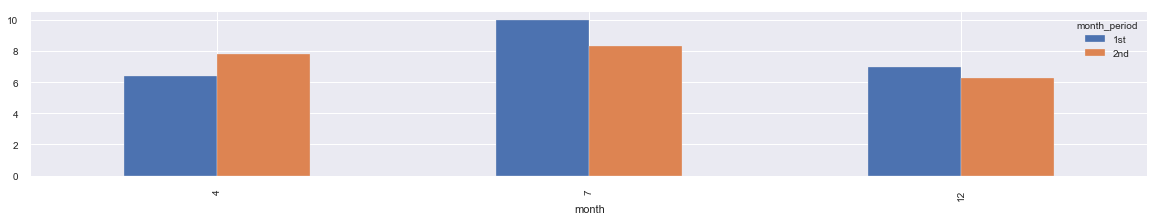

In [63]:
Month_Trend = Top_3_Months.groupby([ 'month', 'month_period'])['Delay_ratio'].mean()
Month_Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

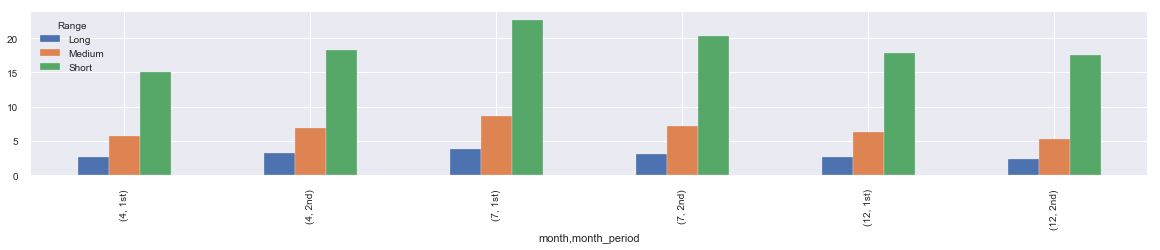

In [64]:
Month_Trend = Top_3_Months.groupby([ 'month', 'month_period', 'Range'])['Delay_ratio'].mean()
Month_Trend.unstack().plot.bar(stacked=False,figsize=(20,3))

### Problem Statement 22: Best Performing Airlines by Range

In [125]:
#Long Range Airlines perfomance in terms of delay ratio

Long_Range=Flight_df[Flight_df.Range=='Long']

Long_Range.groupby('carrier').agg(np.size)                 
Long_Best = Long_Range.groupby('carrier').agg({'Delay_ratio' :[np.size,np.mean]})
                                                
                                                                
Long_Best.sort_values([('Delay_ratio', 'mean')], ascending=True).head(5)


Delay_ratio          
               size      mean
carrier                      
AS            714.0 -0.413442
OO              4.0 -0.198413
HA            342.0 -0.138776
AA          23583.0 -0.001630
US           2271.0  0.026110

In [66]:
#Mid Range Airlines perfomance in terms of delay ratio

Mid_Range=Flight_df[Flight_df.Range=='Medium']

Mid_Range.groupby('carrier').agg(np.size)                 
Mid_Best = Mid_Range.groupby('carrier').agg({'Delay_ratio' :[np.size,np.mean]})
                                                
                                                                
Mid_Best.sort_values([('Delay_ratio', 'mean')], ascending=True).head(5)

Delay_ratio          
               size      mean
carrier                      
AA           7691.0 -0.052929
US           8632.0  0.451589
UA          12283.0  0.526483
DL          18135.0  0.611120
9E           6811.0  1.168285

In [67]:
#Short Range Airlines perfomance in terms of delay ratio

Short_Range=Flight_df[Flight_df.Range=='Short']

Short_Range.groupby('carrier').agg(np.size)                 
Short_Best = Short_Range.groupby('carrier').agg({'Delay_ratio' :[np.size,np.mean]})
                                                
                                                                
Short_Best.sort_values([('Delay_ratio', 'mean')], ascending=True).head(5)

Delay_ratio          
               size      mean
carrier                      
DL           1879.0  0.142295
AA           1455.0  1.004733
US           9632.0  1.200268
UA           5247.0  1.889336
OO             27.0  2.288367

## Conclusion

- Departure traffic is almost evenly distributed at all the three NYC Airports, but Newark(EWR) has slightly more traffic than others.
- Airport operating hours (for departure flight) is also almost equal.
- JFK is having more number of Long Range flights.
- EWR having higher delayed flights than other two airport and high Average delayed flights.
- Top Three Airlines Carriers At all NYC Airports are UA, B6 and EV, and they are having approx. 65% of total scheduled departure.
- Most of the flights are getting delayed in April, July and December.
- But Average delay time is higher in Jun (second half), July(First half) and December(First Half). as these are the starting time for Summer and Inter vacations.
- During Peak months most of the flights are getting delayed on Sundays and Mondays.
- For the peak months Delay ratio is increasing with the time of departure at each of the airports.
- Short range flights are getting delayed on by average of 16 minutes on Sunday and 18 Minutes on Mondays.
- Delay Ratio for Short range flights are higher compared to Mid range flights, and long range flights are having least delay ratios. One of the few reasons might be that there may be many scheduled flights from the same aircraft for short range and chance are high that there may be certain delay in peak hours as frequent take off and landings of short duration flights.
- In terms of Delay ratio (Minutes per 100 Miles)
  - Best Long Range Carrier is AS
  - Best Mid Range Carrier is AA
  - Best Short Rane Carrier is DL